In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 500
CHANNELS=3
EPOCHS=50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/b v d/training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 683 files belonging to 2 classes.


In [ ]:
from PIL import Image
import os

# Define the directory containing your images
image_dir = '/content/drive/MyDrive/b v d'

# List all files in the directory
image_files = os.listdir(image_dir)

# Loop through each image file and convert to PNG format
for filename in image_files:
    if filename.endswith('.jepg'):  # Adjust the extension based on your image format
        # Open the image file
        img = Image.open(os.path.join(image_dir, filename))
        # Save the image in PNG format
        img.save(os.path.join(image_dir, filename.split('.')[0] + '.jpeg'))


In [ ]:
class_names = train_dataset.class_names
class_names

['Bird', 'Drone']

In [ ]:
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 500, 500, 3)
[1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0]


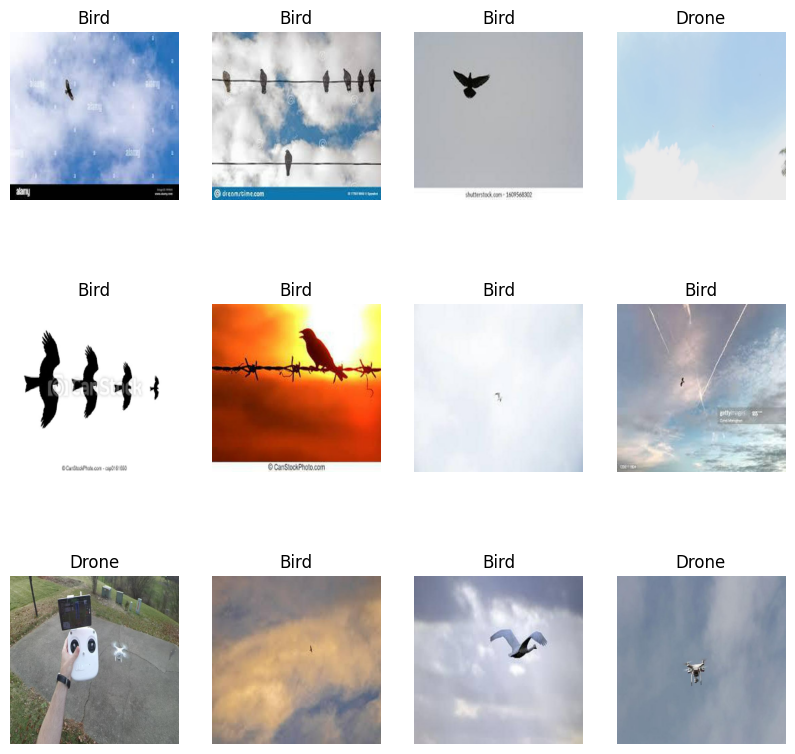

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/b v d/testing",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 124 files belonging to 2 classes.


In [ ]:
val_size=0.1
len(train_dataset)*0.1

2.2

In [ ]:
val_dataset= train_dataset.take(3)
len(val_dataset)

3

In [ ]:
train_dataset=train_dataset.skip(3)
len(train_dataset)

19

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for image, label in train_dataset.take(1):
  print(f"Input image shape: {image.shape}")
  print(f"Input image data type: {image.dtype}")


Input image shape: (32, 500, 500, 3)
Input image data type: <dtype: 'float32'>


In [ ]:
val_dataset = val_dataset.map(
    lambda x, y: (data_augmentation(x, training=False), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Check the output image format
for image, label in val_dataset.take(1):
  print(f"Output image shape: {image.shape}")
  print(f"Output image data type: {image.dtype}")


Output image shape: (32, 500, 500, 3)
Output image data type: <dtype: 'float32'>


In [ ]:
vgg19_model=Sequential()
from tensorflow import keras
pretrained_model=keras.applications.VGG19(include_top=False,input_shape=(500,500,3),weights="imagenet",pooling='max',classes=2)
for layer in pretrained_model.layers:
  layer.trainable=False
vgg19_model.add(pretrained_model)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(128,activation='relu'))
vgg19_model.add(Dense(256,activation='relu'))
vgg19_model.add(Dense(1,activation='sigmoid'))

In [ ]:
vgg19_model.build(input_shape=(500, 500, 3))

In [ ]:
vgg19_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 20123329 (76.76 MB)
Trainable params: 98945 (386.50 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
vgg19_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history =vgg19_model.fit(train_dataset, validation_data=(val_dataset), epochs=50)

Epoch 1/50
19/19 [==============================] - 69s 3s/step - loss: 3.7182 - accuracy: 0.6951 - val_loss: 0.6504 - val_accuracy: 0.8958
Epoch 2/50
19/19 [==============================] - 67s 3s/step - loss: 0.7282 - accuracy: 0.8773 - val_loss: 0.9097 - val_accuracy: 0.8750
Epoch 3/50
19/19 [==============================] - 68s 3s/step - loss: 0.5047 - accuracy: 0.8927 - val_loss: 0.1760 - val_accuracy: 0.9375
Epoch 4/50
19/19 [==============================] - 64s 3s/step - loss: 0.3834 - accuracy: 0.9319 - val_loss: 0.3996 - val_accuracy: 0.9271
Epoch 5/50
19/19 [==============================] - 64s 3s/step - loss: 0.1605 - accuracy: 0.9540 - val_loss: 0.1472 - val_accuracy: 0.9583
Epoch 6/50
19/19 [==============================] - 65s 3s/step - loss: 0.2449 - accuracy: 0.9353 - val_loss: 0.3260 - val_accuracy: 0.9479
Epoch 7/50
19/19 [==============================] - 66s 3s/step - loss: 0.2302 - accuracy: 0.9353 - val_loss: 0.0989 - val_accuracy: 0.9583
Epoch 8/50
19/19 [==

In [ ]:
# Save model to a specific directory
vgg19_model.save('/content/drive/MyDrive/saved_models/vgg19_model.h5')

In [ ]:
# Save model to the current directory
vgg19_model.save('vgg19_model.h5')

In [ ]:
scores = vgg19_model.evaluate(test_dataset)

4/4 [==============================] - 4s 859ms/step - loss: 0.3706 - accuracy: 0.9355


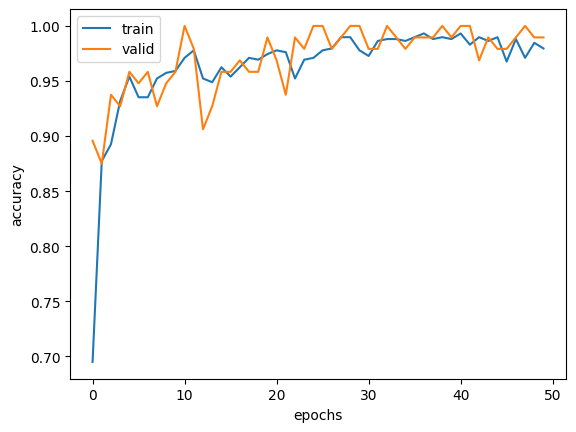

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","valid"])
plt.show()

In [ ]:
test_loss, test_accuracy = vgg19_model.evaluate(test_dataset)

4/4 [==============================] - 4s 872ms/step - loss: 0.3706 - accuracy: 0.9355


In [ ]:
print(f"test accuracy: {test_accuracy * 100:.2f}%")
print(f"test loss: {test_loss * 100:.2f}%")

test accuracy: 93.55%
test loss: 37.06%


In [ ]:
 import tensorflow as tf
 import numpy as np
 from sklearn.metrics import classification_report, confusion_matrix
 import seaborn as sns
 import matplotlib.pyplot as plt
 # Load your trained model
 vgg19_model = tf.keras.models.load_model('/content/drive/MyDrive/modelvgg19.h5')
 # Load and preprocess the test dataset
 test_dataset_path = '/content/drive/MyDrive/b v d/testing'  # Replace with the path to your test dataset
 test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dataset_path,
    labels='inferred',
    label_mode='binary',  # Adjust based on your label mode
    batch_size=32,
    image_size=(500, 500)
 )
 # Define the class names
 class_names = ['Drones', 'Birds']  # Adjust based on your classes
 # Initialize lists to store true labels and predictions
 true_labels = []
 predictions = []

Found 124 files belonging to 2 classes.


In [ ]:
import tensorflow as tf

# Assuming images is your input data with shape (32, 500, 500, 3)
resized_images = tf.image.resize(image, (128, 128))

# Now, pass the resized_images to your model for prediction
predicted_labels = vgg19_model.predict(resized_images)


1/1 [==============================] - 0s 172ms/step


In [ ]:
 # Iterate through the test dataset to make predictions
for images, labels in test_ds:
    # Convert NumPy array to list before extending
    true_labels.extend(labels.numpy().tolist())
    predicted_labels = vgg19_model.predict(images)
    predictions.extend((predicted_labels > 0).astype(int).flatten())  # Adjust the threshold as needed

1/1 [==============================] - 0s 237ms/step


1/1 [==============================] - 0s 180ms/step


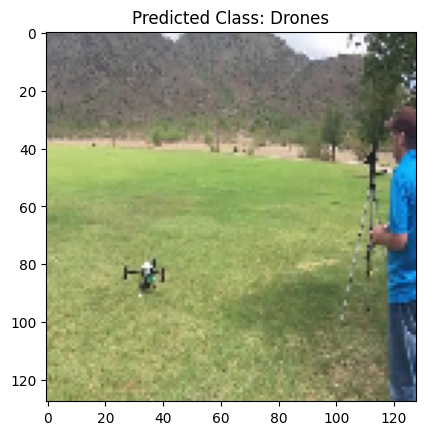

In [ ]:
 import tensorflow as tf
 import numpy as np
 import matplotlib.pyplot as plt
 # Load your trained model
 model = tf.keras.models.load_model('/content/drive/MyDrive/modelvgg19.h5')
 # Load and preprocess the image you want to predict
 # image_path ='/kaggle/input/birds-vs-drone-dataset/BirdVsDrone/Birds/singleBirdinsky124.jpeg'
 # image_path = '/kaggle/input/birds-vs-drone-dataset/BirdVsDrone/Birds/singleBirdinsky102.jpeg'  # Replace with the pa
 image_path = '/content/drive/MyDrive/b v d/testing/Drone/video14_78.JPEG'
 img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128), color_mode='rgb')
 x = tf.keras.preprocessing.image.img_to_array(img)
 x = np.expand_dims(x, axis=0)
 x = x / 255.0  # Normalize the image to [0, 1]
 # Make predictions on the preprocessed image
 predictions = model.predict(x)
 predicted_class = 'Drones' if predictions[0] > 0.5 else 'Birds'
 # Visualize the image and predicted class
 plt.imshow(img)
 plt.title(f'Predicted Class: {predicted_class}')
 plt.show()

In [ ]:
model = models.Sequential([

    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=50,
)

Epoch 1/50
19/19 [==============================] - 57s 3s/step - loss: 21.9423 - accuracy: 0.4957 - val_loss: 0.6565 - val_accuracy: 0.6250
Epoch 2/50
19/19 [==============================] - 54s 3s/step - loss: 0.6885 - accuracy: 0.6065 - val_loss: 0.5897 - val_accuracy: 0.6354
Epoch 3/50
19/19 [==============================] - 54s 3s/step - loss: 0.7021 - accuracy: 0.5230 - val_loss: 0.7040 - val_accuracy: 0.5000
Epoch 4/50
19/19 [==============================] - 56s 3s/step - loss: 0.6962 - accuracy: 0.5230 - val_loss: 0.6987 - val_accuracy: 0.4896
Epoch 5/50
19/19 [==============================] - 54s 3s/step - loss: 0.6291 - accuracy: 0.6525 - val_loss: 0.5804 - val_accuracy: 0.6875
Epoch 6/50
19/19 [==============================] - 55s 3s/step - loss: 0.5860 - accuracy: 0.6848 - val_loss: 0.5538 - val_accuracy: 0.7917
Epoch 7/50
19/19 [==============================] - 57s 3s/step - loss: 0.4987 - accuracy: 0.7802 - val_loss: 0.7086 - val_accuracy: 0.6875
Epoch 8/50
19/19 [=

In [ ]:
scores = model.evaluate(test_dataset)

4/4 [==============================] - 3s 791ms/step - loss: 0.5087 - accuracy: 0.7016


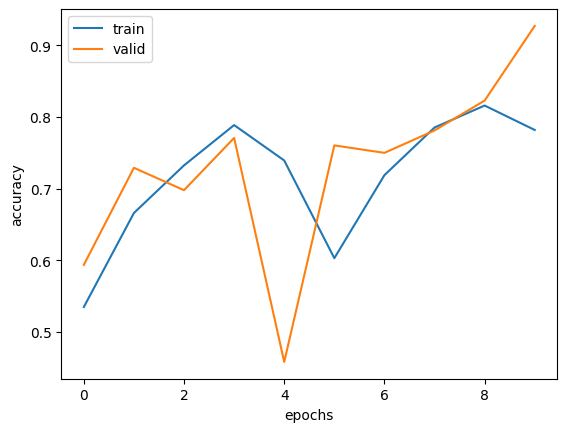

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","valid"])
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

4/4 [==============================] - 1s 102ms/step - loss: 0.5087 - accuracy: 0.7016


In [ ]:
print(f"test accuracy: {test_accuracy * 100:.2f}%")
print(f"test loss: {test_loss * 100:.2f}%")

test accuracy: 70.16%
test loss: 50.87%


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=10,
)

Epoch 1/10
19/19 [==============================] - 49s 2s/step - loss: 0.5746 - accuracy: 0.8024 - val_loss: 0.2329 - val_accuracy: 0.8958
Epoch 2/10
19/19 [==============================] - 31s 2s/step - loss: 0.1516 - accuracy: 0.9472 - val_loss: 0.0570 - val_accuracy: 0.9896
Epoch 3/10
19/19 [==============================] - 31s 2s/step - loss: 0.0990 - accuracy: 0.9710 - val_loss: 0.0524 - val_accuracy: 0.9896
Epoch 4/10
19/19 [==============================] - 32s 2s/step - loss: 0.0849 - accuracy: 0.9625 - val_loss: 0.0533 - val_accuracy: 0.9792
Epoch 5/10
19/19 [==============================] - 32s 2s/step - loss: 0.0692 - accuracy: 0.9744 - val_loss: 0.0347 - val_accuracy: 0.9896
Epoch 6/10
19/19 [==============================] - 32s 2s/step - loss: 0.0578 - accuracy: 0.9813 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 31s 2s/step - loss: 0.0426 - accuracy: 0.9915 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 8/10
19/19 [==

In [ ]:
scores = model.evaluate(test_dataset)

4/4 [==============================] - 10s 3s/step - loss: 0.2529 - accuracy: 0.9194


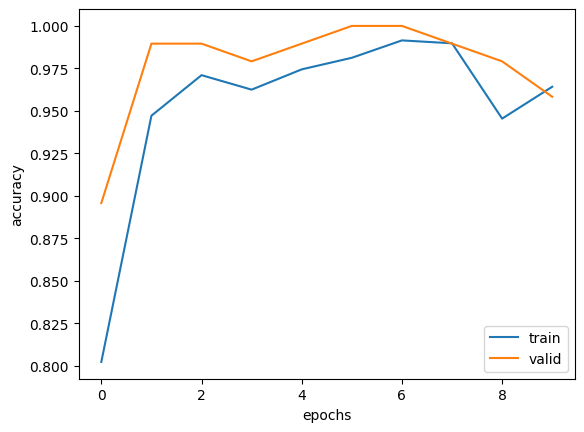

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","valid"])
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

4/4 [==============================] - 2s 478ms/step - loss: 0.2529 - accuracy: 0.9194


In [ ]:
print(f"test accuracy: {test_accuracy * 100:.2f}%")
print(f"test loss: {test_loss * 100:.2f}%")

test accuracy: 91.94%
test loss: 25.29%
